In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_load_lib import get_from_STEAD, get_from_INSTANCE,  get_instance_for_training,train_instance_plot

## Check STEAD

In [2]:
STEAD_csv_file_name = '/mnt/GPT_disk/DL_datasets/STEAD/metadata_eq.csv'
STEADDatasetPath = '/mnt/GPT_disk/DL_datasets/STEAD/waveforms.hdf5'
STEAD_csv = pd.read_csv(STEAD_csv_file_name)

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


MOD.BK_20150724072737_EV
(6000, 3)


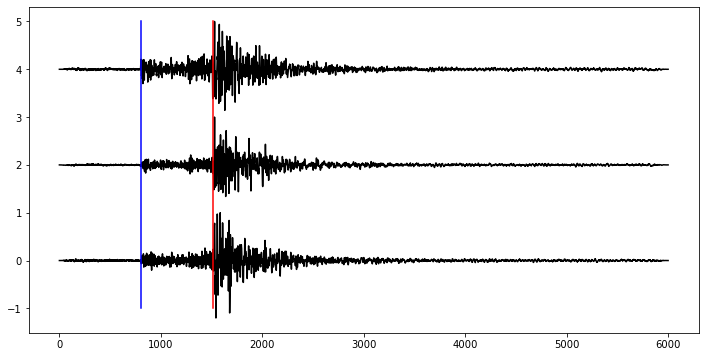

In [3]:
keys = list(STEAD_csv['trace_name'])
choice = np.random.choice(keys)
print(choice)
data, p_t, s_t = get_from_STEAD(key = choice, h5file_path=STEADDatasetPath)
print(np.shape(data))
plt.figure(figsize=(12,6))
# normalize data for plot
for ch_dx in range(np.shape(data)[-1]):
    data[:,ch_dx] -= np.mean(data[:,ch_dx])
    data[:,ch_dx] /= np.max(data[:,ch_dx])
    plt.plot(data[:,ch_dx]+ ch_dx*2,color='k')
plt.plot([p_t,p_t],[-1,5],'b')
plt.plot([s_t,s_t],[-1,5],'r')
#plt.savefig('/home/zhaoming/xzw/DiTIngModelZoo_V2/Debug_imgs/get_from_STEAD.png',dpi=300)
plt.show()
plt.close()

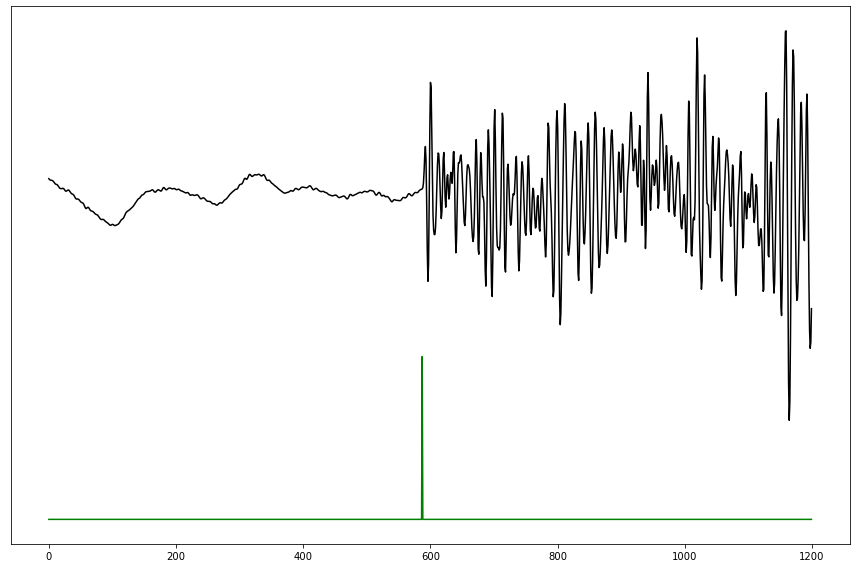

In [4]:
keys = list(STEAD_csv['trace_name'])
choice_key = np.random.choice(keys)
temp_data_X, temp_data_Y = get_instance_for_training(dataset='STEAD',
                                                     dataset_path=STEADDatasetPath,
                                                     data_length = 1200,
                                                     data_channel_num = 1,
                                                     key = choice_key,
                                                     wave_type='P',
                                                     shift_max = 400)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/STEAD_P_vis.png')

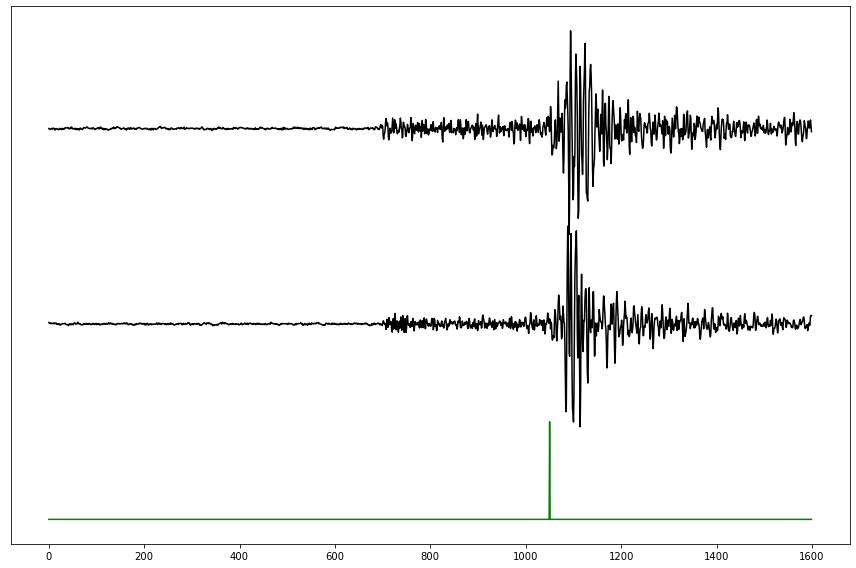

In [5]:
keys = list(STEAD_csv['trace_name'])
choice_key = np.random.choice(keys)
temp_data_X, temp_data_Y = get_instance_for_training(dataset='STEAD',
                                                     dataset_path=STEADDatasetPath,
                                                     data_length = 1600,
                                                     data_channel_num = 2,
                                                     key = choice_key,
                                                     wave_type='S',
                                                     shift_max = 400)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/STEAD_S_vis.png')

## Check INSTANCE

In [6]:
INSTANCEDatasetPath = '/mnt/GPT_disk/DL_datasets/INSTANCE/Instance_events_counts.hdf5'
INSTANCE_csv_file_name = '/mnt/GPT_disk/DL_datasets/INSTANCE/metadata_Instance_events_both_p_s.csv'
INSTANCE_csv = pd.read_csv(INSTANCE_csv_file_name)

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (24,25,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


20499111.YD.T1412..EH
(12000, 3)


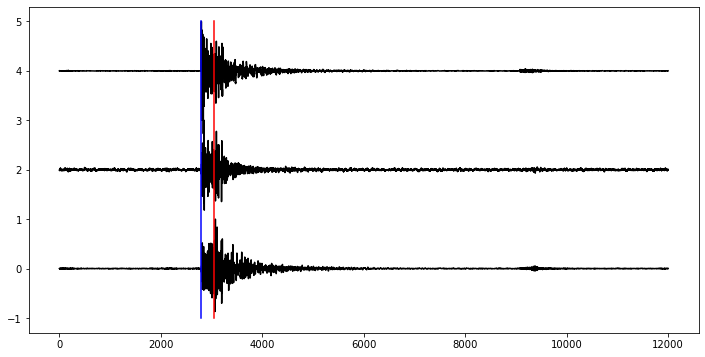

In [7]:
total_lines = len(INSTANCE_csv)
choice_id = np.random.randint(total_lines)
choice_line = INSTANCE_csv.iloc[choice_id]

key = choice_line['trace_name']
print(key)

p_t = choice_line['trace_P_arrival_sample']
s_t = choice_line['trace_S_arrival_sample']

data = get_from_INSTANCE(key=key, h5file_path=INSTANCEDatasetPath)
data = data.T
print(np.shape(data))
plt.figure(figsize=(12,6))
# normalize data for plot
for ch_dx in range(np.shape(data)[-1]):
    data[:,ch_dx] -= np.mean(data[:,ch_dx])
    data[:,ch_dx] /= np.max(data[:,ch_dx])
    plt.plot(data[:,ch_dx]+ ch_dx*2,color='k')
plt.plot([p_t,p_t],[-1,5],'b')
plt.plot([s_t,s_t],[-1,5],'r')
#plt.savefig('/home/zhaoming/xzw/DiTIngModelZoo_V2/Debug_imgs/get_from_STEAD.png',dpi=300)
plt.show()
plt.close()

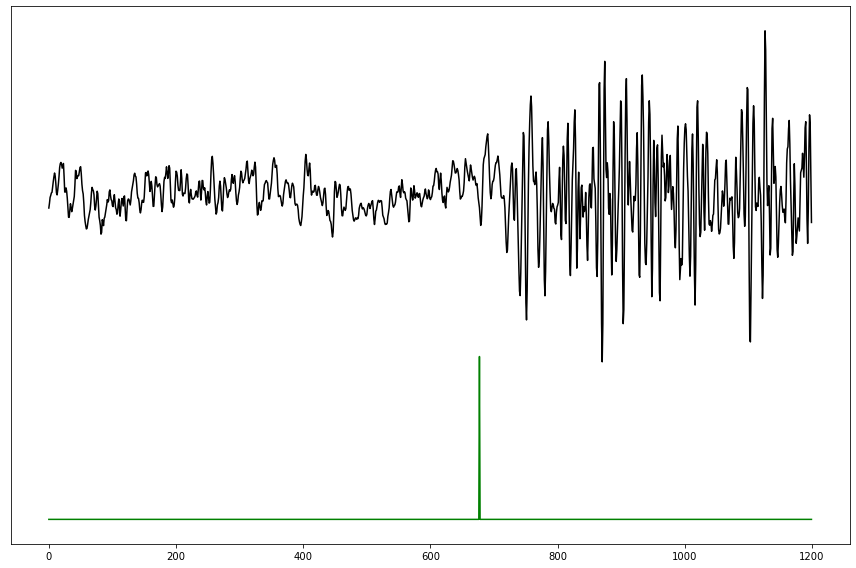

In [8]:
total_lines = len(INSTANCE_csv)
choice_id = np.random.choice(total_lines)

choice_line = INSTANCE_csv.iloc[choice_id]
key = choice_line['trace_name']
p_t = choice_line['trace_P_arrival_sample']
s_t = choice_line['trace_S_arrival_sample']

temp_data_X, temp_data_Y = get_instance_for_training(dataset='INSTANCE',
                                                     dataset_path=INSTANCEDatasetPath,
                                                     data_length = 1200,
                                                     data_channel_num = 1,
                                                     key = key,
                                                     wave_type = 'P',
                                                     shift_max = 400,
                                                     p_t = p_t,
                                                     s_t = s_t)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/INSTANCE_P_vis.png')

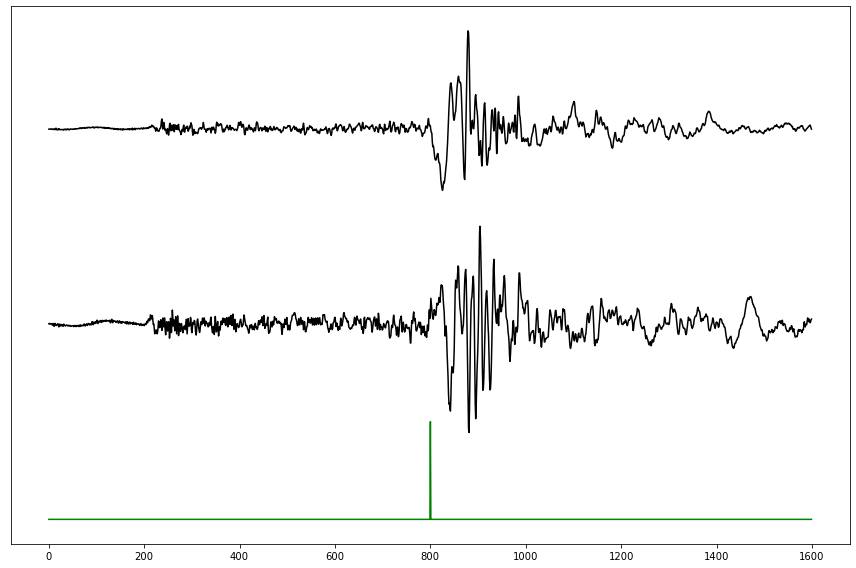

In [9]:
total_lines = len(INSTANCE_csv)
choice_id = np.random.choice(total_lines)

choice_line = INSTANCE_csv.iloc[choice_id]
key = choice_line['trace_name']
p_t = choice_line['trace_P_arrival_sample']
s_t = choice_line['trace_S_arrival_sample']

temp_data_X, temp_data_Y = get_instance_for_training(dataset='INSTANCE',
                                                     dataset_path=INSTANCEDatasetPath,
                                                     data_length = 1600,
                                                     data_channel_num = 2,
                                                     key = key,
                                                     wave_type = 'S',
                                                     shift_max = 1,
                                                     p_t = p_t,
                                                     s_t = s_t)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/INSTANCE_S_vis.png')